Before dive into the Renthop Rental Inquiries challenge, you want to know about Renthop, isn't it? 
You can look at [here](http:/https://www.renthop.com/).

 **Renthop want to simplify your apartment search.**
Apartment hunting can be overwhelming, but we realized that finding a new home isn't about looking at every apartment listing, it's about looking at the best ones. Quality, not quantity.
With the powers of math and technology combined, we created RentHop, a site that sorts listings by quality. We know you don't want to see listings without photos or from unresponsive landlords and brokers, so unlike other sites that only sort by price or posting date, our HopScore (a sophisticated set of algorithms) ranks apartment listings by quality, so only the best rise to the top.
We currently serve most major U.S. cities.

For this project, we took on the Two Sigma Connect: Rental Listing Inquiries Challenge on Kaggle.  The rental  website Renthop provided us with a csv of data from 120,000 listings and asked us to produce a model to predict whether a given listing would receive "low," "medium," or "high" interest.  

In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np 
import pandas as pd 
import matplotlib  
from matplotlib import rcParams 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
terrain = sns.color_palette(palette='terrain',n_colors=10)
plasma = sns.color_palette(palette='plasma',n_colors=10)
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)

from bokeh.io import output_notebook
from bokeh.layouts import gridplot,row,column
from bokeh.plotting import figure,show
output_notebook()

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Loading BokehJS ...

In [3]:
train = pd.read_json(open("C:/Users/Ravi/Downloads/Downloads/Pucho Intern/Two Sigma Connect Rental Listing Inquiries/files/train.json", "r"))

In [4]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [5]:
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [6]:
train.interest_level.value_counts(dropna = False)

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

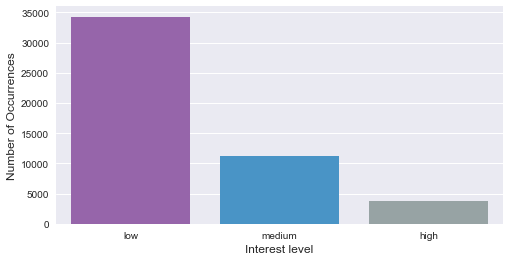

In [7]:
color_palette = ["#9b59b6","#3498db","#95a5a6"]
fig =plt.figure(figsize=(8,4))
g = sns.countplot(x="interest_level", data=train, palette=color_palette, order=['low','medium','high'])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show(g)


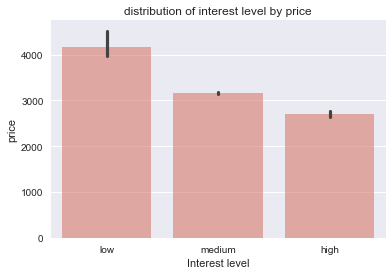

In [8]:
sns.barplot(train['interest_level'], train['price'], alpha=0.6, color=plasma[6], order=['low','medium','high'])
plt.title('distribution of interest level by price')
plt.ylabel('price')
plt.xlabel('Interest level')
plt.show()

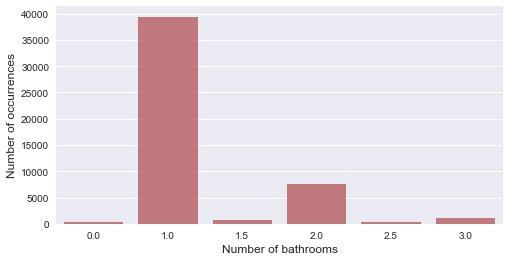

In [17]:
fig = plt.figure(figsize=(8,4))
cnt_srs = train['bathrooms'].value_counts()
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
#sns.countplot(cnt_srs.index, ax = plt.subplot(221));
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Number of bathrooms', fontsize=12)
plt.show()

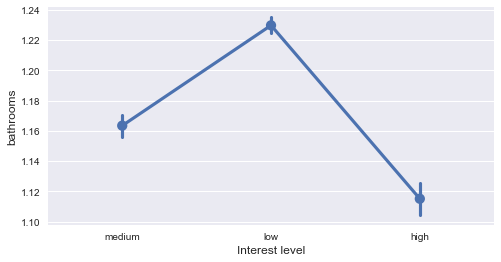

In [64]:
train['bathrooms'].loc[train['bathrooms']>3] = 3
plt.figure(figsize=(8,4))
sns.pointplot(x='interest_level', y='bathrooms', data=train)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('bathrooms', fontsize=12)
plt.show()

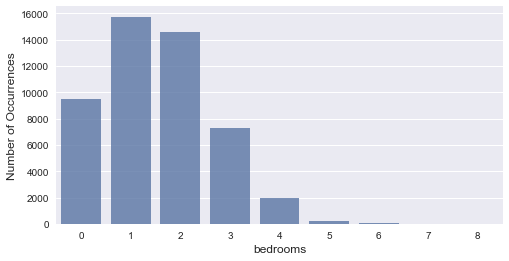

In [10]:
cnt_srs = train['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

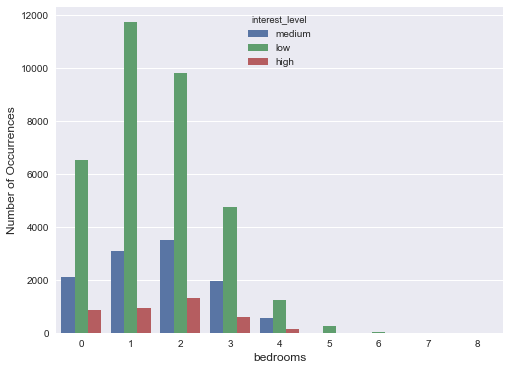

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

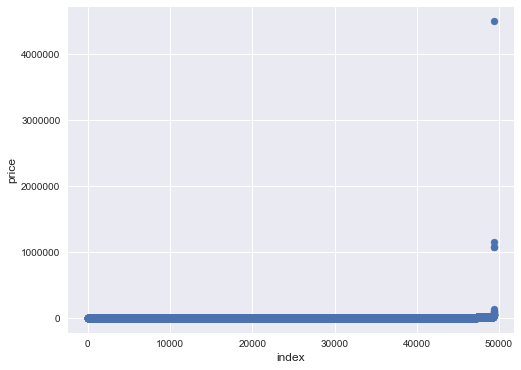

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

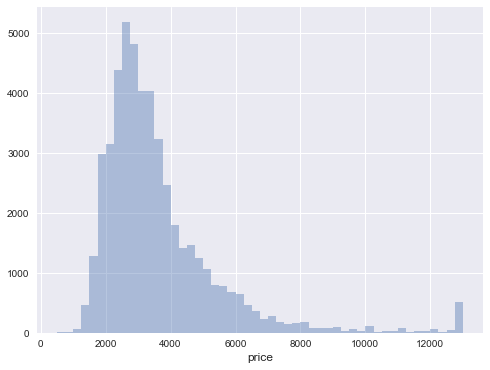

In [65]:
ulimit = np.percentile(train.price.values, 99)
train['price'].loc[train['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train.price.values, bins=50, kde=False)
plt.xlabel('price', fontsize=12)
plt.show()

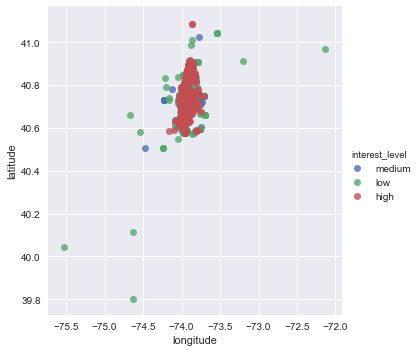

In [23]:
train_dis=train[train['latitude']!=0]
train_dis=train_dis[train_dis['latitude']<42]
train_dis=train_dis[train_dis['longitude']>-80]
g=sns.lmplot(x='longitude',y='latitude',data=train_dis,hue='interest_level',fit_reg=False)

In [24]:
p = figure(title="interest level based on geography",y_range=(40.65,40.85),x_range=(-74.05,-73.85))
p.xaxis.axis_label = 'latitude'
p.yaxis.axis_label = 'longitude'
lowLat=train['latitude'][train['interest_level']=='low']
lowLong=train['longitude'][train['interest_level']=='low']
medLat=train['latitude'][train['interest_level']=='medium']
medLong=train['longitude'][train['interest_level']=='medium']
highLat=train['latitude'][train['interest_level']=='high']
highLong=train['longitude'][train['interest_level']=='high']
p.circle(lowLong,lowLat,size=3,color=terrain.as_hex()[1],fill_alpha=0.1,line_alpha=0.1,legend='low')
p.circle(medLong,medLat,size=3,color=plasma.as_hex()[9],fill_alpha=0.1,line_alpha=0.1,legend='med')
p.circle(highLong,highLat,size=3,color=plasma.as_hex()[5],fill_alpha=0.1,line_alpha=0.1,legend='high')
show(p, notebook_handle=True)

In [25]:
p1 = figure(width=500, height=500, title=None,y_range=(40.65,40.85),x_range=(-74.05,-73.85))
p1.circle(lowLong,lowLat,size=3,color=terrain.as_hex()[1],fill_alpha=0.1,line_alpha=0.1,legend='low')
p2 = figure(width=500, height=500, title=None,y_range=(40.65,40.85),x_range=(-74.05,-73.85))
p2.circle(medLong,medLat,size=3,color=plasma.as_hex()[9],fill_alpha=0.1,line_alpha=0.1,legend='med')
p3 = figure(width=500, height=500, title=None,y_range=(40.65,40.85),x_range=(-74.05,-73.85))
p3.circle(highLong,highLat,size=3,color=plasma.as_hex()[5],fill_alpha=0.1,line_alpha=0.1,legend='high')
show(column(p1,p2,p3), notebook_handle=True)

In [26]:
lat_pct = np.percentile(train.latitude, [1, 99]).tolist()
print(lat_pct)

train['latitude'] = np.where(train['latitude'] < lat_pct[0], lat_pct[0], 
                             np.where(train['latitude'] > lat_pct[1], lat_pct[1], train['latitude']))

[40.6404, 40.862047]


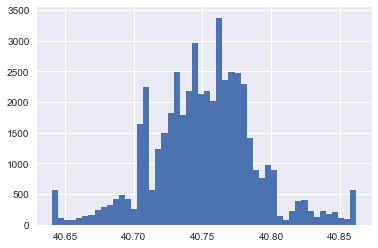

In [27]:
train['latitude'].hist(bins = 50)

In [28]:
long_pct = np.percentile(train.longitude, [1, 99]).tolist()
print(long_pct)

train['longitude'] = np.where(train['longitude'] < long_pct[0], long_pct[0], 
                             np.where(train['longitude'] > long_pct[1], long_pct[1], train['longitude']))

[-74.0162, -73.852651]


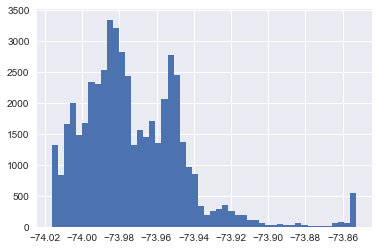

In [29]:
train['longitude'].hist(bins = 50)

In [30]:
price_pct = np.percentile(train.price, [1, 5, 95, 99]).tolist()
print(price_pct)

train['price'] = np.where(train['price'] < 500, 500, 
                             np.where(train['price'] > 20000, 20000, train['price']))

[1475.0, 1800.0, 6895.0, 13000.0]


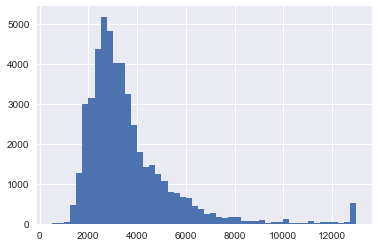

In [31]:
train.price.hist(bins = 50)

In [32]:
train.groupby('interest_level').price.median()

interest_level
high      2400.0
low       3300.0
medium    2895.0
Name: price, dtype: float64

In [33]:
train['pricetobedroom'] = train.price / train.bedrooms
train['pricetobathroom'] = train.price / train.bathrooms

print(train.loc[:, ['interest_level', 'price', 'bedrooms', 'bathrooms', 'pricetobedroom', 'pricetobathroom']]\
.groupby('interest_level').agg('median'))

                 price  bedrooms  bathrooms  pricetobedroom  pricetobathroom
interest_level                                                              
high            2400.0         2        1.0          1625.0           2300.0
low             3300.0         1        1.0          2700.0           2997.5
medium          2895.0         2        1.0          1887.5           2650.0


In [34]:
grp = train.groupby(['latitude', 'longitude'])
cnt1 = grp.interest_level.apply(lambda x: x.value_counts()).reset_index(name="interest_level_cnts")
cnt2 = grp.size().reset_index(name = 'size')
cnt = pd.merge(cnt1, cnt2, how = 'inner', on = ["latitude", "longitude"])
cnt['pct'] = cnt.interest_level_cnts / cnt.loc[:, 'size']

[]

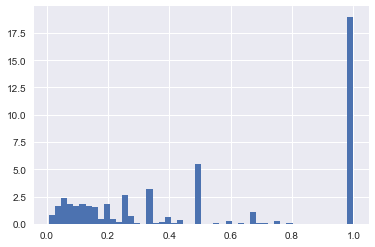

In [35]:
cnt.query('level_2 == "high"').sort_values('pct').pct.hist(bins = 50, normed=True)
plt.plot()

[]

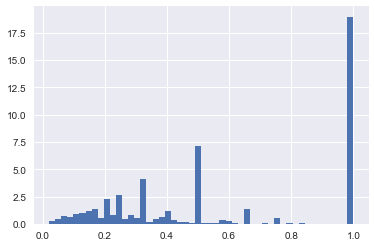

In [36]:
cnt.query('level_2 == "medium"').sort_values('pct').pct.hist(bins = 50, normed=True)
plt.plot()

[]

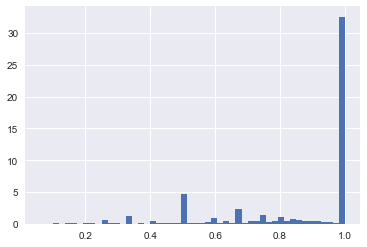

In [37]:
cnt.query('level_2 == "low"').sort_values('pct').pct.hist(bins = 50, normed=True)
plt.plot()

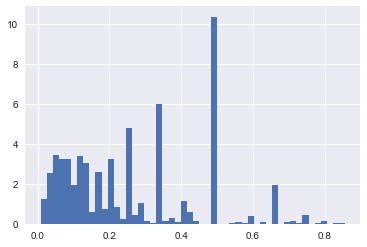

In [38]:
cnt.query('level_2 == "high" & pct < 1').sort_values('pct').pct.hist(bins = 50, normed=True)

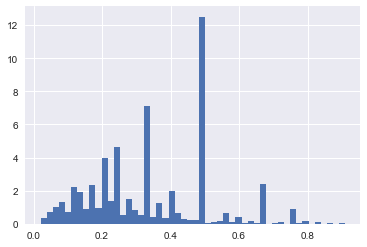

In [39]:
cnt.query('level_2 == "medium" & pct < 1').sort_values('pct').pct.hist(bins = 50, normed=True)

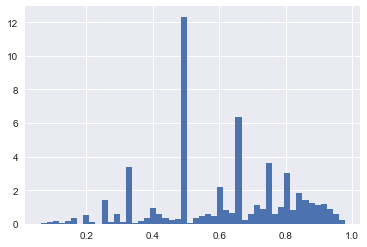

In [40]:
cnt.query('level_2 == "low" & pct < 1').sort_values('pct').pct.hist(bins = 50, normed=True)

In [41]:
cnt_mix = cnt.loc[:, ['latitude', 'longitude', 'pct']].query('pct < 1').drop_duplicates(['latitude', 'longitude'])
train_mix = pd.merge(train, cnt_mix, how = 'inner', on = ['latitude', 'longitude'])

print(train_mix.loc[:, ['interest_level', 'price', 'bedrooms', 'bathrooms', 'pricetobedroom', 'pricetobathroom']]\
.groupby('interest_level').agg('median'))

                 price  bedrooms  bathrooms  pricetobedroom  pricetobathroom
interest_level                                                              
high            2560.0         2        1.0     1666.666667           2430.0
low             3325.0         1        1.0     2795.000000           3000.0
medium          2950.0         2        1.0     1933.333333           2700.0


In [42]:
train['display_address2'] = train.display_address.map(lambda x: " ".join(x.strip("-,.$*!#&\'\t").replace("'",'').lower()\
                                                                         .replace('street', 'st').replace('avenue', 'ave')\
                                                                         .replace('east', 'e').replace('west', 'w').split()))
train['display_address2'].value_counts(dropna = False)[:20]

wall st          451
broadway         443
e 34th st        441
w st             412
w 37th st        370
second ave       370
john st          346
gold st          345
york ave         316
washington st    304
w 42nd st        295
columbus ave     292
lexington ave    283
e 39th st        281
water st         280
first ave        268
e 79th st        253
e 35th st        251
w 54th st        240
e 89th st        238
Name: display_address2, dtype: int64

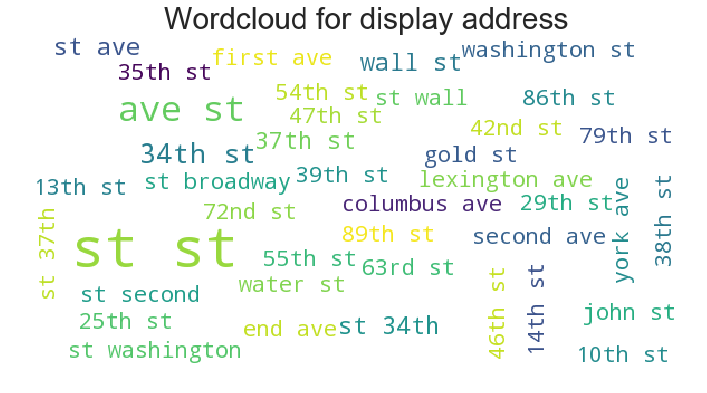

In [43]:
from wordcloud import WordCloud
display_address_word = ' '.join(train['display_address2'].values.tolist())

plt.figure(figsize=(12, 9))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(display_address_word)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for display address", fontsize=30)
plt.axis("off")
plt.show()

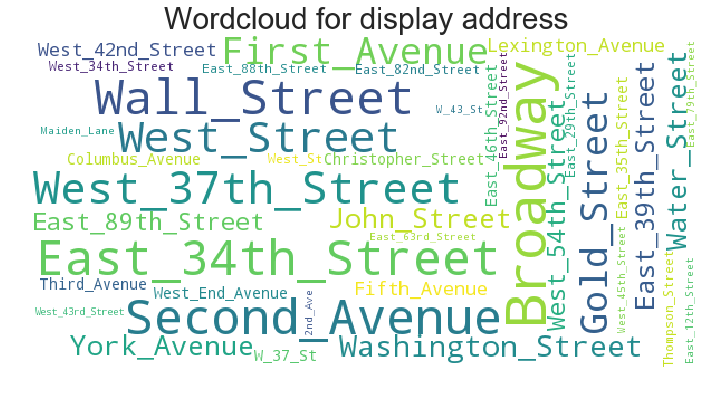

In [44]:
display_address_word2 = ' '.join(train.display_address.map(lambda x: '_'.join(x.strip().split(" "))))

plt.figure(figsize=(12, 9))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(display_address_word2)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for display address", fontsize=30)
plt.axis("off")
plt.show()

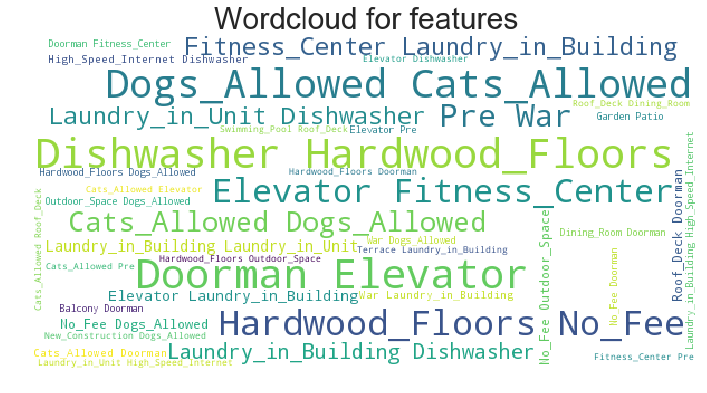

In [45]:
feature_list = train.features.values.tolist()
feature_list_all = [item for sublist in feature_list for item in sublist]
feature_list_all_norm = map(lambda x: "_".join(x.strip().split(" ")), feature_list_all)
feature_list_all_norm_ = " ".join(feature_list_all_norm)

plt.figure(figsize=(12, 9))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(feature_list_all_norm_)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for features", fontsize=30)
plt.axis("off")
plt.show()

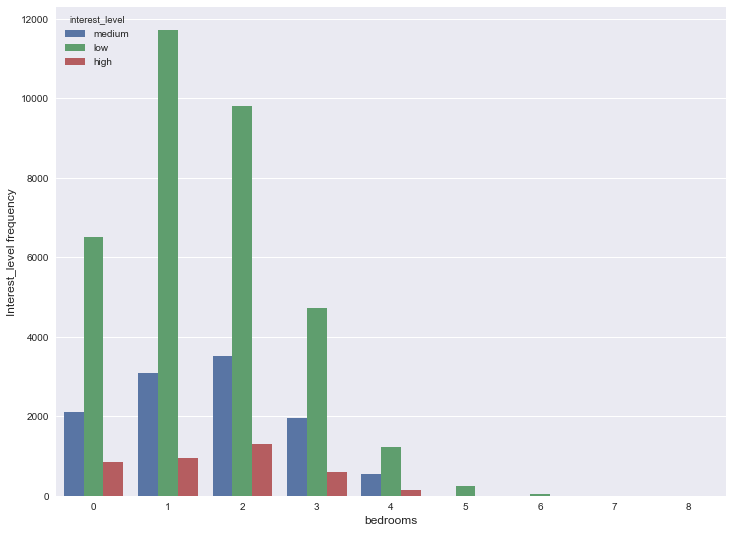

In [46]:
plt.figure(figsize=(12, 9))
ax = sns.countplot(x='bedrooms', hue='interest_level', data=train)
plt.ylabel('Interest_level frequency', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

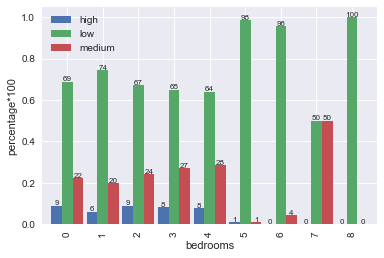

In [47]:
f = lambda x: x.value_counts()/x.shape[0]
s = train.groupby('bedrooms').interest_level.apply(f)
s = s.unstack(level = -1)

fig, ax = plt.subplots()
s.plot.bar(width = .9, ax = ax)
for p in ax.patches: 
    ax.annotate(int(np.round(p.get_height()*100)), (p.get_x()+p.get_width()/2., p.get_height()), \
                ha='center', va='center', xytext=(0, 3), size = 8, textcoords='offset points') 

plt.legend(loc = 0)
plt.ylabel("percentage*100")

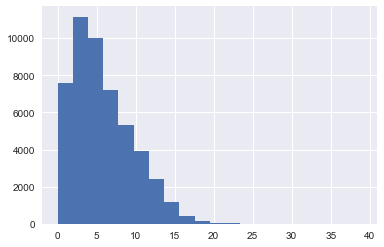

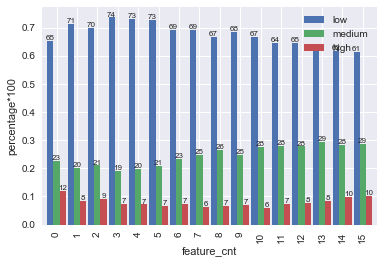

In [48]:
train['feature_cnt'] = train.features.map(lambda x: len(x))

train['feature_cnt'].hist(bins = 20)
train['feature_cnt'] = np.where(train['feature_cnt']<=15, train['feature_cnt'], 15)

f = lambda x: x.value_counts()/x.shape[0]
s = train.groupby('feature_cnt').interest_level.apply(f)
s = s.unstack(level = -1)

fig, ax = plt.subplots()
s.plot.bar(width = .9, ax = ax)
for p in ax.patches: 
    ax.annotate(int(np.round(p.get_height()*100)), (p.get_x()+p.get_width()/2., p.get_height()), \
                ha='center', va='center', xytext=(0, 3), size = 8, textcoords='offset points') 

plt.legend(loc = 0)
plt.ylabel("percentage*100")

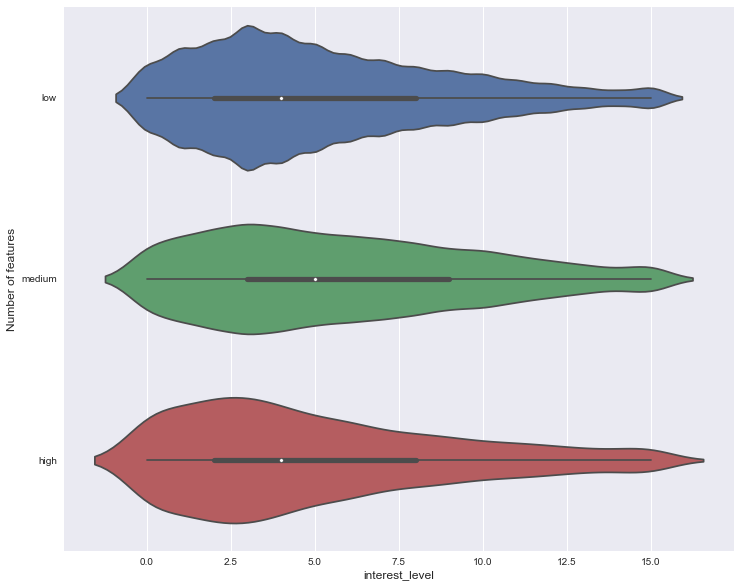

In [49]:
plt.figure(figsize=(12, 10))
sns.violinplot(x="feature_cnt", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('interest_level', fontsize=12)
plt.ylabel('Number of features', fontsize=12)
plt.show()

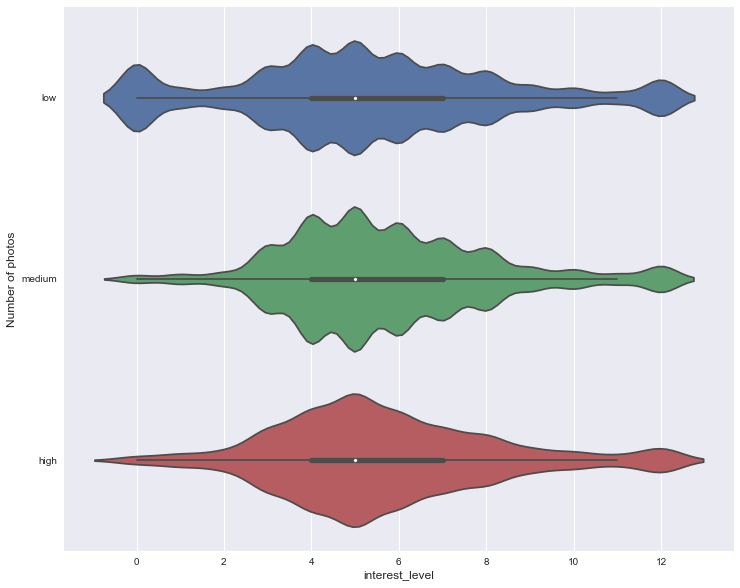

In [66]:
train["num_photos"] = train["photos"].apply(len)
train["num_photos"].loc[train["num_photos"]>12] =12
plt.figure(figsize=(12, 10))
sns.violinplot(x="num_photos", y="interest_level", data=train, order =['low','medium','high'],orient='h')
plt.xlabel('interest_level', fontsize=12)
plt.ylabel('Number of photos', fontsize=12)
plt.show()

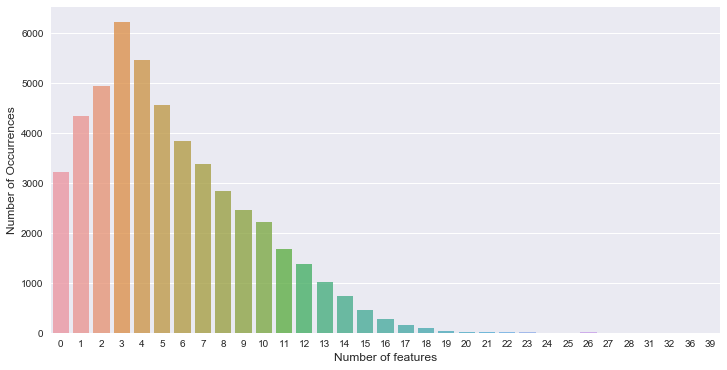

In [51]:
train["num_features"] = train["features"].apply(len)
cnt_srs = train['num_features'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

In [52]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,manager_id,photos,price,street_address,pricetobedroom,pricetobathroom,display_address2,feature_cnt,num_photos,num_features
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,...,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,1000.0,2000.0,metropolitan ave,0,5,0
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,...,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465.0,808 Columbus Avenue,2732.5,5465.0,columbus ave,5,11,5
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,...,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850.0,241 W 13 Street,2850.0,2850.0,w 13 st,4,8,4
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,...,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275.0,333 East 49th Street,3275.0,3275.0,e 49th st,2,3,2
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,...,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350.0,500 West 143rd Street,837.5,3350.0,w 143rd st,1,3,1


In [53]:
#df["num_photos"] = df["photos"].apply(len)
#df["num_features"] = df["features"].apply(len)
train["num_description_words"] = train["description"].apply(lambda x: len(x.split(" ")))
train["created"] = pd.to_datetime(train["created"])
train["created_year"] = train["created"].dt.year
train["created_month"] = train["created"].dt.month
train["created_day"] = train["created"].dt.day

In [54]:
num_fs = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
             "num_photos", "num_features", "num_description_words",
             "created_year", "created_month", "created_day"]
num_fs
X = train[num_fs]
y = train["interest_level"]
X.head()

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_description_words,created_year,created_month,created_day
10,1.5,3,40.7145,-73.9425,3000.0,5,0,95,2016,6,24
10000,1.0,2,40.7947,-73.9667,5465.0,11,5,9,2016,6,12
100004,1.0,1,40.7388,-74.0018,2850.0,8,4,94,2016,4,17
100007,1.0,1,40.7539,-73.9677,3275.0,3,2,80,2016,4,18
100013,1.0,4,40.8241,-73.9493,3350.0,3,1,68,2016,4,28


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

In [56]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.6353464847011089

In [58]:
test = pd.read_json(open("C:/Users/Ravi/Downloads/Downloads/Pucho Intern/Two Sigma Connect Rental Listing Inquiries/files/test.json", "r"))
print(test.shape)
test["num_photos"] = test["photos"].apply(len)
test["num_features"] = test["features"].apply(len)
test["num_description_words"] = test["description"].apply(lambda x: len(x.split(" ")))
test["created"] = pd.to_datetime(test["created"])
test["created_year"] = test["created"].dt.year
test["created_month"] = test["created"].dt.month
test["created_day"] = test["created"].dt.day
X = test[num_fs]

y = clf.predict_proba(X)

(74659, 14)


In [59]:
labels2index = {label: i for i, label in enumerate(clf.classes_)}
labels2index

{'high': 0, 'low': 1, 'medium': 2}

In [60]:
out = pd.DataFrame()
out["listing_id"] = test["listing_id"]
for label in ["high", "medium", "low"]:
    out[label] = y[:, labels2index[label]]

In [61]:
out.to_csv("submission_rf.csv", index=False)

In [62]:
out

,listing_id,high,medium,low
0,7142618,0.085000,0.406000,0.509000
1,7210040,0.307000,0.269000,0.424000
100,7103890,0.017000,0.202000,0.781000
1000,7143442,0.070000,0.295000,0.635000
100000,6860601,0.025000,0.336000,0.639000
100001,6840081,0.000000,0.079000,0.921000
100002,6922337,0.075000,0.567000,0.358000
100003,6913616,0.227000,0.482800,0.290200
100005,6937820,0.048000,0.209000,0.743000
100006,6893933,0.017000,0.140333,0.842667
